In [1]:
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

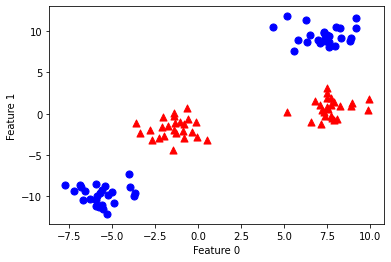

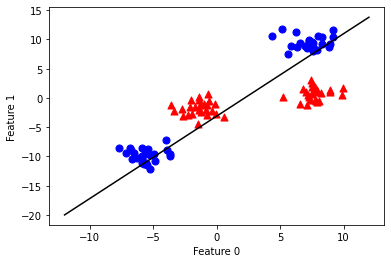

In [5]:
# %load ml02_svm_4blobs.py
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs( centers=4, random_state=8)
y = y%2

import matplotlib.pyplot as pl
attrs0 = {'c':'b', 's':50, 'marker':'o', 'cmap': 'pl.get_cmap("viridis")'}
attrs1 = {'c':'r', 's':50, 'marker':'^', 'cmap': 'pl.get_cmap("viridis")'}
fig,ax = pl.subplots(1,1)
ax.scatter(X[:,0][y==0], X[:,1][y==0], **attrs0)
ax.scatter(X[:,0][y==1], X[:,1][y==1], **attrs1)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
pl.savefig('fig/02_svm_4blobs.png')
#pl.show()

from sklearn.svm import LinearSVC
lsvm = LinearSVC().fit(X,y)
coef = lsvm.coef_[0]
intercept = lsvm.intercept_[0]

fig,ax = pl.subplots(1,1)
ax.scatter(X[:,0][y==0], X[:,1][y==0], **attrs0)
ax.scatter(X[:,0][y==1], X[:,1][y==1], **attrs1)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')

x = np.linspace(-12,12)
ax.plot(x, -(x*coef[0] + intercept)/coef[1], 'k')
pl.savefig('fig/02_svm_4blobs_fit_linear.png')
pl.show()


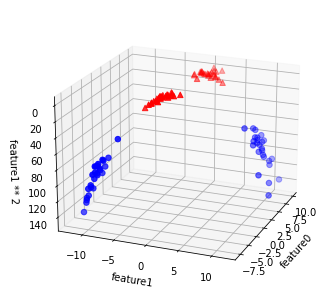

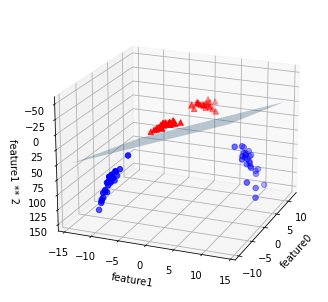

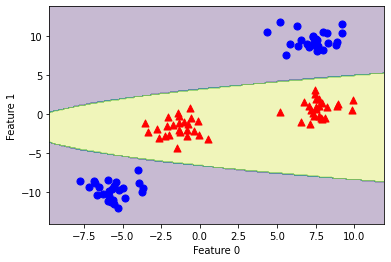

In [3]:
# %load ml02_svm_4blobs_nonlinear.py
import numpy as np
from sklearn.datasets import make_blobs
X, y  = make_blobs( centers=4, random_state=8)
y     = y%2
X_new = np.hstack([X, X[:,1:]**2])

import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D, axes3d
fig    = pl.figure()
ax     = Axes3D( fig, elev=-160, azim=-22)
class0 = (X_new[y==0, 0], X_new[y==0, 1], X_new[y==0,2])
class1 = (X_new[y==1, 0], X_new[y==1, 1], X_new[y==1,2])
ax.scatter( *class0, c='b', marker='o', s=30)
ax.scatter( *class1, c='r', marker='^', s=30)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')
pl.savefig('fig/02_svm_4blobs_nonlinear.png')


from sklearn.svm import LinearSVC
lsvm3  = LinearSVC().fit( X_new, y)
coef   = lsvm3.coef_[0]
interc = lsvm3.intercept_

fig    = pl.figure()
ax     = Axes3D( fig, elev=-160, azim=-22)
class0 = (X_new[y==0, 0], X_new[y==0, 1], X_new[y==0,2])
class1 = (X_new[y==1, 0], X_new[y==1, 1], X_new[y==1,2])
ax.scatter( *class0, c='b', marker='o', s=30)
ax.scatter( *class1, c='r', marker='^', s=30)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

xx = np.linspace( X_new[:,0].min()-2, X_new[:,0].max()+2, 200)
yy = np.linspace( X_new[:,1].min()-2, X_new[:,1].max()+2, 200)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX + coef[1]*YY + interc)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

pl.savefig('fig/02_svm_4blobs_nonlinear_plane.png')


fig,ax  = pl.subplots(1,1)
data    = np.c_[ XX.ravel(), YY.ravel(), YY.ravel() **2]
dec     = lsvm3.predict(data)
dec     = dec.reshape( XX.shape )
ax.contourf( XX, YY, dec, level2=[dec.min(), 0, dec.max()], alpha=0.3 )
attrs0 = {'c':'b', 's':50, 'marker':'o', 'cmap': 'pl.get_cmap("viridis")'}
attrs1 = {'c':'r', 's':50, 'marker':'^', 'cmap': 'pl.get_cmap("viridis")'}
ax.scatter(X[:,0][y==0], X[:,1][y==0], **attrs0)
ax.scatter(X[:,0][y==1], X[:,1][y==1], **attrs1)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
pl.savefig('fig/02_svm_4blobs_boundary.png')
pl.show()




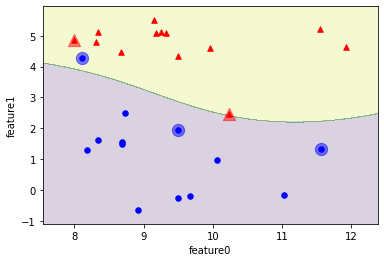

In [7]:
# %load ml02_svm_kernel.py
import data.gen_data as gd
X,y = gd.make_binary()

from sklearn.svm import SVC
svm    = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
sv     = svm.support_vectors_  # plot with larger marker size
dcoef  = svm.dual_coef_.ravel()# importance coefficients for sv
clabel = dcoef > 0             # sign gives the class labels for sv


def plot_boundary(classifier, X, ax):
    import numpy as np
    eps          = X.std()/8
    x_min, x_max = X[:,0].min() - eps, X[:,0].max() + eps
    y_min, y_max = X[:,1].min() - eps, X[:,1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    
import matplotlib.pyplot as pl
fig,ax = pl.subplots(1,1)
plot_boundary(svm, X,ax)
ax.scatter( X[y==0,0], X[y==0,1], c='b', s=30, marker='o')
ax.scatter( X[y==1,0], X[y==1,1], c='r', s=30, marker='^')
ax.scatter( sv[~clabel, 0], sv[~clabel, 1], c='b', s=150, marker='o', alpha=0.5)
ax.scatter( sv[ clabel, 0], sv[ clabel, 1], c='r', s=150, marker='^', alpha=0.5)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
pl.savefig('fig/02_svm_kernel.png')
pl.show()





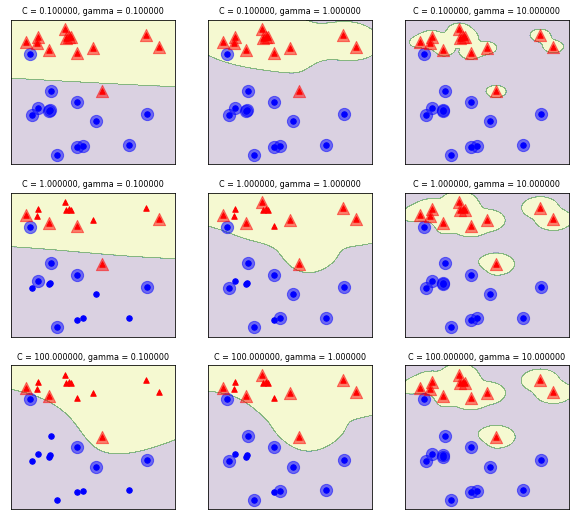

In [9]:
# %load ml02_svm_kernel_generalize.py
import numpy as np
import matplotlib.pyplot as pl
import data.gen_data as gd
X,y = gd.make_binary()

from sklearn.svm import SVC
svm    = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
sv     = svm.support_vectors_  # plot with larger marker size
dcoef  = svm.dual_coef_.ravel()# importance coefficients for sv
clabel = dcoef > 0             # sign gives the class labels for sv


def plot_boundary(classifier, X, ax):
    import numpy as np
    eps          = X.std()/8
    x_min, x_max = X[:,0].min() - eps, X[:,0].max() + eps
    y_min, y_max = X[:,1].min() - eps, X[:,1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)


def plot_sv_boundary(svm, X, ax):
    sv     = svm.support_vectors_
    dcoef  = svm.dual_coef_.ravel()
    clabel = dcoef > 0
    plot_boundary(svm, X,ax)
    ax.scatter( X[y==0,0], X[y==0,1], c='b', s=30, marker='o')
    ax.scatter( X[y==1,0], X[y==1,1], c='r', s=30, marker='^')
    ax.scatter( sv[~clabel, 0], sv[~clabel, 1], c='b', s=150, marker='o', alpha=0.5)
    ax.scatter( sv[ clabel, 0], sv[ clabel, 1], c='r', s=150, marker='^', alpha=0.5)


fig,axes = pl.subplots(3,3, figsize=(10,9))
gamma, C = np.meshgrid([0.1, 1.0 ,10.0 ], [0.1, 1.0, 100])
params   = zip( gamma.ravel(), C.ravel() )
for (g,c), ax in zip( params, axes.ravel()):
    svm    = SVC(kernel='rbf', C=c, gamma=g).fit(X,y)
    plot_sv_boundary(svm, X, ax)
    ax.set_title( 'C = %4f, gamma = %4f'%(c,g), fontsize=8)
    ax.set_xticks([]); ax.set_yticks([])

pl.savefig('fig/02_svm_kernel_generalize.png')
pl.show()





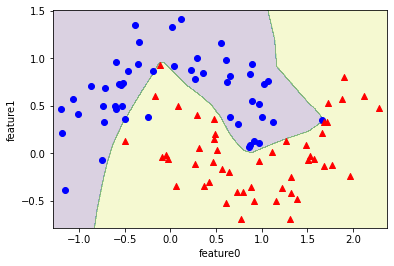

In [11]:
# %load ml02_mlp_moon.py
from sklearn.datasets import make_moons
X,y = make_moons( n_samples=100, noise=0.25, random_state=3)

from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X,y, random_state=4, stratify=y)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train,y_train)

def plot_boundary(classifier, X, ax):
    import numpy as np
    eps          = X.std()/8
    x_min, x_max = X[:,0].min() - eps, X[:,0].max() + eps
    y_min, y_max = X[:,1].min() - eps, X[:,1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)


import matplotlib.pyplot as pl
fig,ax = pl.subplots(1,1)
plot_boundary(mlp, X, ax)
ax.scatter(X[y==0,0],X[y==0,1], c='b', marker='o')
ax.scatter(X[y==1,0],X[y==1,1], c='r', marker='^')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
pl.savefig('fig/02_mlp_moons.png')
pl.show()


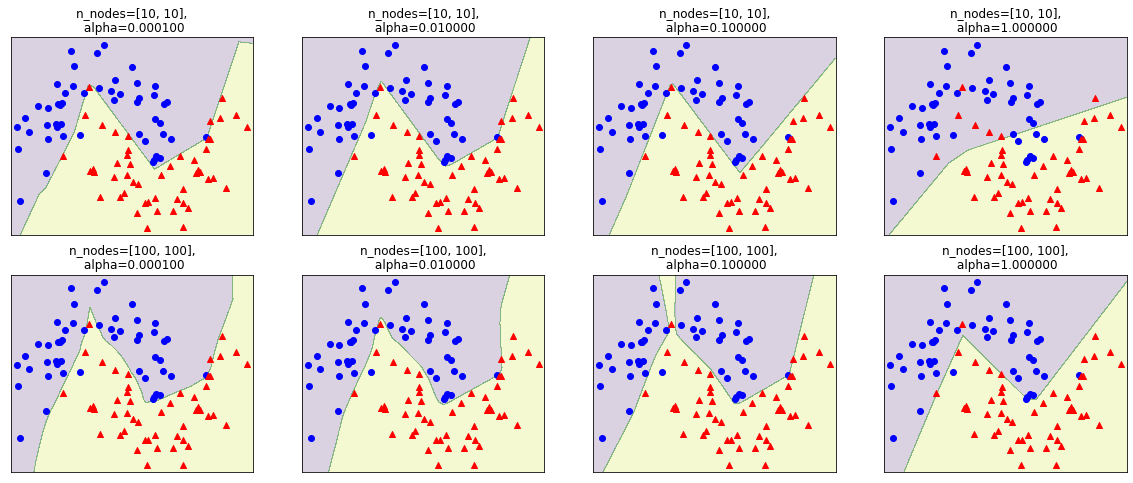

In [14]:
# %load ml02_mlp_moon_complexity.py
from sklearn.datasets import make_moons
X,y = make_moons( n_samples=100, noise=0.25, random_state=3)

from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X,y, random_state=4, stratify=y)

def plot_boundary(classifier, X, ax):
    import numpy as np
    eps          = X.std()/8
    x_min, x_max = X[:,0].min() - eps, X[:,0].max() + eps
    y_min, y_max = X[:,1].min() - eps, X[:,1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)


from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as pl
fig,axes = pl.subplots(2,4, figsize=(20,8))
for axx, n_hnodes in zip( axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hnodes,n_hnodes],
                            alpha=alpha)
        mlp.fit(X_train,y_train)
        plot_boundary(mlp, X, ax)
        ax.scatter(X[y==0,0],X[y==0,1], c='b', marker='o')
        ax.scatter(X[y==1,0],X[y==1,1], c='r', marker='^')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title('n_nodes=[%d, %d],\n alpha=%f'%(n_hnodes,n_hnodes,alpha)); 
pl.savefig('fig/02_mlp_moons_complexity.png')
pl.show()


In [15]:
# Spot-checking ML algorithms
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

X, y = load_digits(return_X_y=True)
print(X.shape, y.shape)

(1797, 64) (1797,)


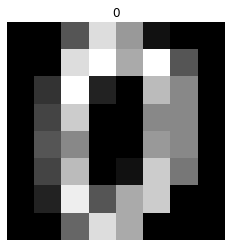

In [24]:
# To view one of the image
import matplotlib.pyplot as plt

img = X[0, :].reshape(8, 8)
plt.imshow(img, cmap='gray')
plt.axis(False)
plt.title(y[0])
plt.show()

In [16]:
X_train, X_test, y_train, y_test = split(X, y, stratify=y, random_state=42)

models = []
models.append(('knn', KNeighborsClassifier()))
models.append(('lgr', LogisticRegression()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('gbc', GradientBoostingClassifier()))
models.append(('svc', SVC()))
models.append(('mlp', MLPClassifier()))


In [17]:
best_score = 0
best_model = None

for n, m in models:
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print(f'Model: {n}, Score: {score}')
    if score > best_score:
        best_score = score
        best_model = m
        
print(f'Best model: {best_model}, best score: {best_score}')

Model: knn, Score: 0.9844444444444445
Model: lgr, Score: 0.9622222222222222
Model: dtc, Score: 0.8222222222222222
Model: rfc, Score: 0.9644444444444444
Model: gbc, Score: 0.9555555555555556
Model: svc, Score: 0.9911111111111112
Model: mlp, Score: 0.9733333333333334
Best model: SVC(), best score: 0.9911111111111112


In [18]:
# Save the model using joblib dump
from joblib import dump
dump(best_model, 'best_model.job')

['best_model.job']

In [19]:
# load the model using joblib load
from joblib import load
my_model = load('best_model.job')

print(my_model.score(X_test, y_test))

0.9911111111111112


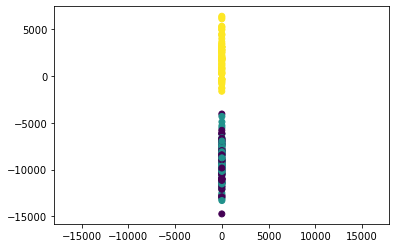

0.6933333333333334


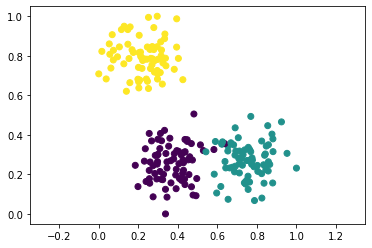

0.9866666666666667


In [26]:
# %load https://pastebin.com/raw/jJvTCFd9
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

df = read_csv('https://bit.ly/2Ql5WEg')
X1 = df.iloc[:, :-1].values  # df.values[:, :-1]
y1 = df.iloc[:, -1].values  # df.values[:, -1]
X1_train, X1_test, y1_train, y1_test = split(X1, y1, stratify=y1, random_state=41)

xx = X1_train[:, 0]
yy = X1_train[:, 1]
plt.scatter(xx, yy, c=y1_train)
plt.axis('equal')
plt.show()

knn1 = KNeighborsClassifier().fit(X1_train, y1_train)
print(knn1.score(X1_test, y1_test))

scl = MinMaxScaler()
X2_train = scl.fit_transform(X1_train)
X2_test = scl.transform(X1_test)

xx = X2_train[:, 0]
yy = X2_train[:, 1]
plt.scatter(xx, yy, c=y1_train)
plt.axis('equal')
plt.show()

knn2 = KNeighborsClassifier().fit(X2_train, y1_train)
print(knn2.score(X2_test, y1_test))

In [28]:
# %load ml03_categorical.py
import pandas as pd
df = pd.read_csv('data/adult.csv', header=None, index_col=False,
                 names=['age', 'workclass', 'fnlwgt', 'education',
                        'education_num', 'maritial_status', 'occupation',
                        'relationshi', 'race', 'gender','capital_gain',
                        'capital_loss','hours_per_week','native_country',
                        'income'])
df = df[['age','workclass','education','gender','hours_per_week',
         'occupation','income']]
print(df.head())
print(df.occupation.value_counts())

df2 = df[['occupation','gender', 'income']]
df2 = pd.get_dummies(df2)
print(df2.shape)      # (32561,17)
print(df2.columns)

X = df2.loc[:, 'occupation_ ?':'gender_ Male']
X = X.values
y = df2['income_ >50K']
y = y.values

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X,y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print(logreg.score(X_test, y_test))             # 0.776808746

# Numbers as categorical data
df3  = pd.DataFrame({'checkbox':[0, 1, 0, 2],
                    'color':['white','white','blue','black']})
_df3 = pd.get_dummies(df3)
print(_df3.columns)

df3['checkbox'] = df3['checkbox'].astype(str)
_df3 = pd.get_dummies(df3)
print(_df3.columns)



   age          workclass   education   gender  hours_per_week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K  
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: 

In [31]:
# %load ml03_categorical_exercise.py
# Handling of missing data and converting categorical features to numerical features
import pandas as pd
df = pd.DataFrame({'age': [17, 23, 'x', 38, 54, 67, 32],
                  'size': ['XS', 'M', 'L', 'XL', 'S', 'L', 'M'],
                  'gender':['M', 'F', 'f', 'M', 'M', 'F', 'F']})
print(df)
size_mapping = {'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5}

  age size gender
0  17   XS      M
1  23    M      F
2   x    L      f
3  38   XL      M
4  54    S      M
5  67    L      F
6  32    M      F


In [32]:
print(df.info())
df.replace({'x': None}, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     7 non-null      object
 1   size    7 non-null      object
 2   gender  7 non-null      object
dtypes: object(3)
memory usage: 296.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     6 non-null      float64
 1   size    7 non-null      object 
 2   gender  7 non-null      object 
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes
None


In [33]:
df['size'] = df['size'].map(size_mapping)
df

,age,size,gender
0,17.0,1,M
1,23.0,3,F
2,NaN,4,f
3,38.0,5,M
4,54.0,2,M
5,67.0,4,F
6,32.0,3,F


In [34]:
df1 = pd.get_dummies(df)
df1

,age,size,gender_F,gender_M,gender_f
0,17.0,1,0,1,0
1,23.0,3,1,0,0
2,NaN,4,0,0,1
3,38.0,5,0,1,0
4,54.0,2,0,1,0
5,67.0,4,1,0,0
6,32.0,3,1,0,0


In [35]:
df['gender'] = df['gender'].str.upper()
df

,age,size,gender
0,17.0,1,M
1,23.0,3,F
2,NaN,4,F
3,38.0,5,M
4,54.0,2,M
5,67.0,4,F
6,32.0,3,F


In [36]:
df2 = pd.get_dummies(df)
df2

,age,size,gender_F,gender_M
0,17.0,1,0,1
1,23.0,3,1,0
2,NaN,4,1,0
3,38.0,5,0,1
4,54.0,2,0,1
5,67.0,4,1,0
6,32.0,3,1,0


In [37]:
# df2.dropna() #  to drop the row with missing data
df2['age'] = df2['age'].fillna(df2['age'].median())
df2

,age,size,gender_F,gender_M
0,17.0,1,0,1
1,23.0,3,1,0
2,35.0,4,1,0
3,38.0,5,0,1
4,54.0,2,0,1
5,67.0,4,1,0
6,32.0,3,1,0
